<a href="https://colab.research.google.com/github/Sedvin1903/oibsip_dstask5/blob/main/Oasis_TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tabulate import tabulate
import warnings

In [4]:
# Load the sales data from a CSV file
data = pd.read_csv('Advertising.csv')

In [5]:
# Exploratory Data Analysis (EDA)

print("Data:")
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))
print("")

Data:
╒════╤══════════════╤═══════╤═════════╤═════════════╤═════════╕
│    │   Unnamed: 0 │    TV │   Radio │   Newspaper │   Sales │
╞════╪══════════════╪═══════╪═════════╪═════════════╪═════════╡
│  0 │            1 │ 230.1 │    37.8 │        69.2 │    22.1 │
├────┼──────────────┼───────┼─────────┼─────────────┼─────────┤
│  1 │            2 │  44.5 │    39.3 │        45.1 │    10.4 │
├────┼──────────────┼───────┼─────────┼─────────────┼─────────┤
│  2 │            3 │  17.2 │    45.9 │        69.3 │     9.3 │
├────┼──────────────┼───────┼─────────┼─────────────┼─────────┤
│  3 │            4 │ 151.5 │    41.3 │        58.5 │    18.5 │
├────┼──────────────┼───────┼─────────┼─────────────┼─────────┤
│  4 │            5 │ 180.8 │    10.8 │        58.4 │    12.9 │
╘════╧══════════════╧═══════╧═════════╧═════════════╧═════════╛



In [6]:
# Check data statistics
print("Data Statistics:")
print(tabulate(data.describe(), headers='keys', tablefmt='fancy_grid'))
print("")

Data Statistics:
╒═══════╤══════════════╤══════════╤══════════╤═════════════╤═══════════╕
│       │   Unnamed: 0 │       TV │    Radio │   Newspaper │     Sales │
╞═══════╪══════════════╪══════════╪══════════╪═════════════╪═══════════╡
│ count │     200      │ 200      │ 200      │    200      │ 200       │
├───────┼──────────────┼──────────┼──────────┼─────────────┼───────────┤
│ mean  │     100.5    │ 147.042  │  23.264  │     30.554  │  14.0225  │
├───────┼──────────────┼──────────┼──────────┼─────────────┼───────────┤
│ std   │      57.8792 │  85.8542 │  14.8468 │     21.7786 │   5.21746 │
├───────┼──────────────┼──────────┼──────────┼─────────────┼───────────┤
│ min   │       1      │   0.7    │   0      │      0.3    │   1.6     │
├───────┼──────────────┼──────────┼──────────┼─────────────┼───────────┤
│ 25%   │      50.75   │  74.375  │   9.975  │     12.75   │  10.375   │
├───────┼──────────────┼──────────┼──────────┼─────────────┼───────────┤
│ 50%   │     100.5    │ 149.75   

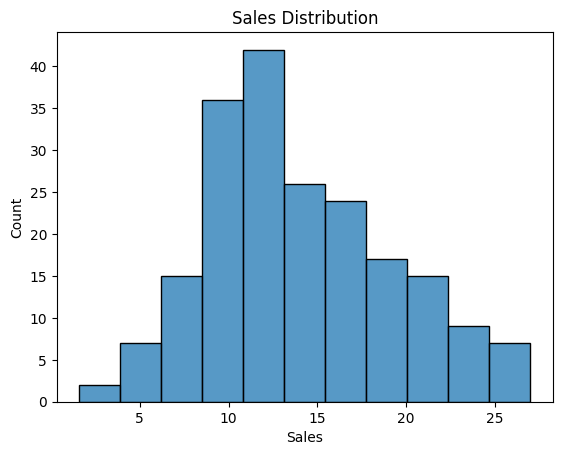

In [7]:
# Visualize the distribution of the target variable (Sales)

sns.histplot(data['Sales'])
plt.title('Sales Distribution')
plt.show()

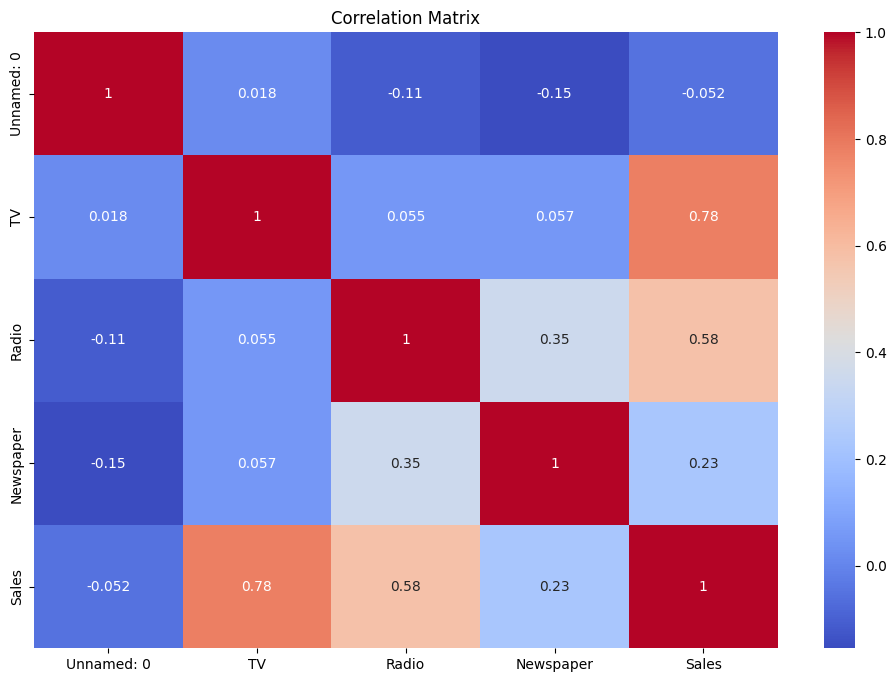

In [8]:
# Visualize the correlation between features

corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
''' Data Preprocessing  '''

In [9]:
# Lag features
data['Lag1'] = data['Sales'].shift(1)
data['Lag2'] = data['Sales'].shift(2)

# Differencing
data['Diff1'] = data['Sales'].diff(1)

# Drop missing values
data = data.dropna()

# Split the dataset into input features (X) and target variable (y)
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# Model Training and Evaluation
models = {
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor()
}

results = []

for model_name, model in models.items():
    if model_name == 'XGBoost':
        # Train the XGBoost model
        model.fit(X_train, y_train)
        # Make predictions on the test set
        y_pred = model.predict(X_test)
    else:
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions on the test set
        y_pred = model.predict(X_test)

    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([model_name, rmse, r2])

# Display model evaluation results
headers = ['Model', 'RMSE', 'R^2 Score']
print(tabulate(results, headers=headers, tablefmt='fancy_grid'))

╒═══════════════════╤═════════════╤═════════════╕
│ Model             │        RMSE │   R^2 Score │
╞═══════════════════╪═════════════╪═════════════╡
│ XGBoost           │ 0.82417     │    0.977863 │
├───────────────────┼─────────────┼─────────────┤
│ Linear Regression │ 7.17173e-15 │    1        │
├───────────────────┼─────────────┼─────────────┤
│ Random Forest     │ 0.860074    │    0.975893 │
╘═══════════════════╧═════════════╧═════════════╛
